In [13]:
import pandas as pd
from helpers import *
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from helpers import *
from eppy.modeleditor import IDF
from IPython.display import display

import os

## Primer estudio 
Input: eppyProject/input/simple_room_1_window_1_door.idf

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy.py

In [ ]:
Tengo que copiar el objeto

In [5]:
data = eso_to_ts('output/no_HVC_no_people_study/eplusout.csv')

idffile = 'input/simple_room_1_window_1_door.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/usr/local/EnergyPlus-9-4-0/WeatherData/USA_CO_Golden-NREL.724666_TMY3.epw'
idf1 = initialization(idffile, iddfile, epwfile)

In [6]:
data.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),THERMAL ZONE 1 THERMAL ZONE:Zone Air Temperature [C](Hourly)
Date/Time,,
2000-01-01 01:00:00,-4.666667,10.327779
2000-01-01 02:00:00,-3.000000,10.459676
2000-01-01 03:00:00,-3.583333,10.301047
2000-01-01 04:00:00,-2.833333,10.218339
2000-01-01 05:00:00,-2.000000,10.265107


In [17]:
@interact
def show_not_null_classes(classes = notnullobj(idf1)):
    return epobject_to_df(idf1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

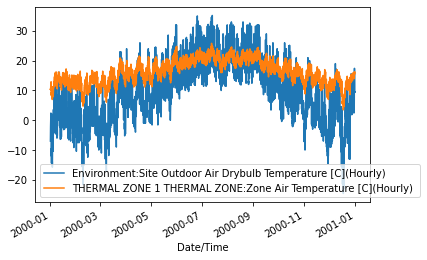

In [5]:
data.plot()

## segundo estudio

Input: 'eppyProject/input/simple_room_1_window_1_door_ventilator_constant.idf'.idf

Using HVACTemplate:System:Unitary

Heating_Setpoint_Schedule_Name 	Always On Continuous

with obj ['PEOPLE', 'LIGHTS', 'ELECTRICEQUIPMENT'] deleted (no lights, people or electricequipment)

Variables: ['Site Outdoor Air Drybulb Temperature','Zone Air Temperature']

python Script: TemperaturaStudy2.py


In [14]:
data2 = eso_to_ts('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/studies/Temperaturestudy2/eplusout.csv')
idffile = 'input/simple_room_1_window_1_door_ventilator_constant.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/usr/local/EnergyPlus-9-4-0/WeatherData/USA_CO_Golden-NREL.724666_TMY3.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [20]:
data2.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),THERMAL ZONE 1:Zone Air Temperature [C](Hourly)
Date/Time,,
2000-01-01 01:00:00,-4.666667,10.686429
2000-01-01 02:00:00,-3.000000,10.760037
2000-01-01 03:00:00,-3.583333,10.564349
2000-01-01 04:00:00,-2.833333,10.457397
2000-01-01 05:00:00,-2.000000,10.486402


In [16]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:xlabel='Date/Time'>

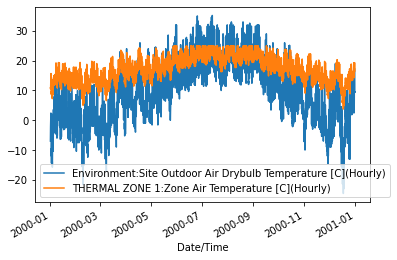

In [11]:
data2.plot()

In [30]:
data.iloc[:,1] == data2.iloc[:,1]
# == data2['THERMAL ZONE 1:Zone Air Temperature [C](Hourly)']

Date/Time
2000-01-01 01:00:00    False
2000-01-01 02:00:00    False
2000-01-01 03:00:00    False
2000-01-01 04:00:00    False
2000-01-01 05:00:00    False
                       ...  
2000-12-31 20:00:00    False
2000-12-31 21:00:00    False
2000-12-31 22:00:00    False
2000-12-31 23:00:00    False
2000-12-31 00:00:00    False
Length: 8760, dtype: bool

In [31]:
data2.iloc[:,1]

Date/Time
2000-01-01 01:00:00    10.686429
2000-01-01 02:00:00    10.760037
2000-01-01 03:00:00    10.564349
2000-01-01 04:00:00    10.457397
2000-01-01 05:00:00    10.486402
                         ...    
2000-12-31 20:00:00    18.569484
2000-12-31 21:00:00    18.046659
2000-12-31 22:00:00    17.739345
2000-12-31 23:00:00    16.501088
2000-12-31 00:00:00    15.520410
Name: THERMAL ZONE 1:Zone Air Temperature [C](Hourly) , Length: 8760, dtype: float64

In [32]:
data.iloc[:,1]

Date/Time
2000-01-01 01:00:00    10.327779
2000-01-01 02:00:00    10.459676
2000-01-01 03:00:00    10.301047
2000-01-01 04:00:00    10.218339
2000-01-01 05:00:00    10.265107
                         ...    
2000-12-31 20:00:00    16.277688
2000-12-31 21:00:00    16.242180
2000-12-31 22:00:00    16.191318
2000-12-31 23:00:00    15.606421
2000-12-31 00:00:00    15.015146
Name: THERMAL ZONE 1 THERMAL ZONE:Zone Air Temperature [C](Hourly) , Length: 8760, dtype: float64